Contents

Importing Libraries
Getting The Dataset

Splitting Dataset into Data and Labels

Binary Classifier

Evaluating Training set

Error Analysis
Image Representation of confusion-matrix

Visualizing predictions

Submission

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting the Dataset

In [2]:

train_data=pd.read_csv('train_digit.csv')
test_data=pd.read_csv('test_digit.csv')

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Since there are no missing values so there is no need to handle the missing values

# Splitting into Data and Labels

In [6]:
X=train_data.drop(['label'],axis=1)
Y=train_data['label'].copy()

In [7]:
X=X.to_numpy()

# Binary Classifier

In [8]:
some_digit=X[3]

# Image

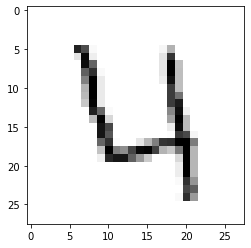

In [9]:
some_digit_shaped=some_digit.reshape(28,28)
plt.imshow(some_digit_shaped,cmap="binary")
plt.show()

In [10]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X,Y)
sgd.predict([some_digit])

array([4], dtype=int64)

Note - The SGDClassifier correctly predicted the digit

In [11]:
sgd.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [12]:
sgd.decision_function([some_digit])

array([[ -3907.92120339, -59172.74462186,   -280.81515366,
         -8218.87229537,   2356.77428172, -10660.40836109,
         -7954.90655955, -13627.8673204 ,  -7027.31556565,
        -12156.12136877]])

The classifier is fairly confident about is predictions and the classifier(class 4) is largely positive with a score of 2602.6310

# Evaluating training set

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X,Y,cv=3,scoring='accuracy')

array([0.88714286, 0.88942857, 0.86307143])

# Error Analysis

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_pred=sgd.predict(X)
train_cm=confusion_matrix(train_pred,Y)
print(train_cm)
print(" ")
accuracy_score(train_pred,Y)

[[4037    3    8    8   10   51   49   10   29   18]
 [   0 4459    2    2   10    3    4    6   23    5]
 [  32   99 3972  259   55  117  526  141  415   27]
 [  14   36   61 3849    9  223   62   40  408  101]
 [  18   15   36    7 3811  119   78   31   77  180]
 [   9   24    1   65    3 3037   53    3  122   11]
 [   4    1    4    0    0    6 3322    1    1    0]
 [   1    2   25   23   12   20    2 4021   11  147]
 [  12   32   62   75   10  105   40   15 2866   21]
 [   5   13    6   63  152  114    1  133  111 3678]]
 


0.8821904761904762

Accuracy on Training Set is : 88.9%

# Image Representation of confusion-matrix

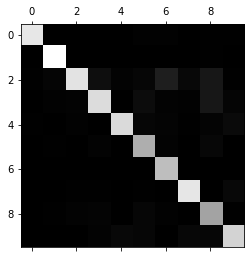

In [15]:
plt.matshow(train_cm,cmap=plt.cm.gray)
plt.show()

The matrix looks good since most images are on the main diagonal i.e. they are classified correctly.

In [16]:
test_data=test_data.values
pred=sgd.predict(test_data)

# Visualizing predictions

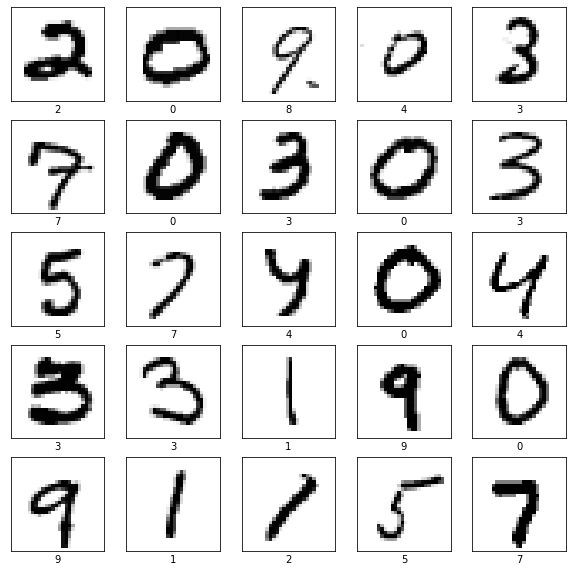

In [17]:
# visualise predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    one_image = test_data[i].reshape(28,28)
    plt.imshow(one_image, cmap=plt.cm.binary)
    plt.xlabel(pred[i])
plt.show()

# Submission

In [18]:
y_pred = pd.Series(pred,name="Predictions")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)

submission.to_csv("mnist_submission.csv",index=False)
submission

,ImageId,Predictions
0,1,2
1,2,0
2,3,8
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
